## Import thư viện

In [9]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Setting

In [3]:
random_state = 42
np.random.seed(random_state)
alpha=0.1

In [4]:
data_folder = "../Dataset"

In [5]:
train_data = pd.read_csv(data_folder + "//dataset.csv", index_col="id")
test_data = pd.read_csv(data_folder + "//test.csv", index_col="id")

## Split data

In [6]:
X=train_data.drop(columns=["sale_price"])
y=train_data["sale_price"]

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=random_state)
X_test=test_data

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((140000, 45), (60000, 45), (140000,), (60000,), (200000, 45))

## Data preparation (preprocessing)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 21269 to 121958
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sale_date         140000 non-null  object 
 1   sale_nbr          110350 non-null  float64
 2   sale_warning      140000 non-null  object 
 3   join_status       140000 non-null  object 
 4   join_year         140000 non-null  int64  
 5   latitude          140000 non-null  float64
 6   longitude         140000 non-null  float64
 7   area              140000 non-null  int64  
 8   city              140000 non-null  object 
 9   zoning            140000 non-null  object 
 10  subdivision       127767 non-null  object 
 11  present_use       140000 non-null  int64  
 12  land_val          140000 non-null  int64  
 13  imp_val           140000 non-null  int64  
 14  year_built        140000 non-null  int64  
 15  year_reno         140000 non-null  int64  
 16  sqft_lot          140

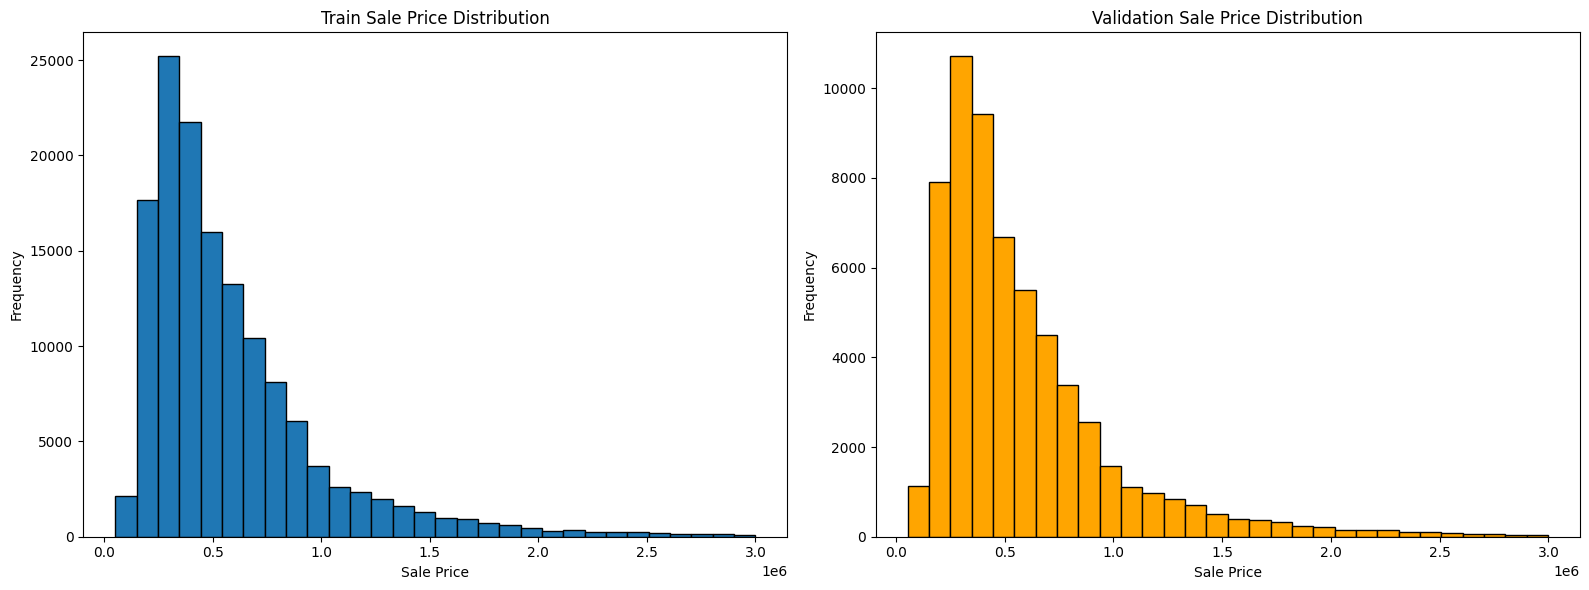

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(y_train, bins=30, edgecolor='black')
axes[0].set_title('Train Sale Price Distribution')
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')

axes[1].hist(y_val, bins=30, edgecolor='black', color='orange')
axes[1].set_title('Validation Sale Price Distribution')
axes[1].set_xlabel('Sale Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Training

In [ ]:
def winkler_score(y_true:float,upper:float,lower:float,alpha=alpha,return_coverage=False):
    """Compute the winkler score for a given true value and prediction interval.
    
    Args:
        y_true (float): true obeserved values
        upper (float): upper bound of the prediction interval
        lower (float): lower bound of the prediction interval
        alpha (float): Significance level for the prediction interval (e.g., 0.1 for 90% intervals).
        return_coverage (bool): If True, also return empirical coverage.
    """
    y_true= np.array(y_true)
    upper  = np.array(upper)
    lower = np.array(lower)
    
    width= upper-lower
    penalty_upper=2/alpha * np.maximum(0, upper - y_true)
    penalty_lower=2/alpha * np.maximum(0, y_true - lower)
    
    score=width
    score+=penalty_upper+penalty_lower
    
    if return_coverage:
        coverage = np.mean((y_true >= lower) & (y_true <= upper))
        return np.mean(score), coverage
    return np.mean(score)